# Shopify Internship Fall Challenge 2022

_Author: Claire Bourque_

---

### Question 1

In my previous Shopify Internship Challenged I used Matlab to perform Data Science analysis. Now that I have taken a course on data science and become more familiar with Python and Jupyter Notebook, I have applied these new skills to solve this challenge again. Using Python on this second try is more straightfoward and streamlines the problem solving process. 

My general approach is the same (to load the data and analyze it graphically) but by using built in Python functions I am able to identify the problem Store Id's much more quickly. It appears in this data set that the number of suspicous purchases have changed. 

The first step was to import the important libraries and load the data for analysis. Then I analysed the data using .head() to see the column headers. I used .describe() to see the data parameters such as mean, count and standard deviation. This quickly revealed the issue because the mean order amount was 3145.13 while the mean total items was 8.78. I then plotted the order amount and total items with respect to the shop ID and the Outlier shops immediately became apperant. I further analyzed all orders over 1000 and found more suspect activity. The suspicious outlier activity was evident in the case of Shop Id 78; this shop was selling sneakers for very high prices. Shop ID 42 also appeared to be producing outlier data initially, but after analzying the results by dividing the order amount by the total items this no longer was the case. This shop also made large volume purchases at the same time of day which would indicate it is buying from a supplier. Using the metric of average cost per shoe to analyze the data gives a more accurate representation of the data set as a whole and the one I would report. After removing the outlier data the average cost per show was found to be 151.79 with a std of 29.03. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in Sneaker Data .csv

In [3]:
data = pd.read_csv('./sneaker_data_set.csv')
data.head()

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11

#### Identified important data parameters such as mean and std

In [24]:
data.describe()

order_id      shop_id      user_id   order_amount  total_items
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720
std    1443.520003    29.006118    87.798982   41282.539349    116.32032
min       1.000000     1.000000   607.000000      90.000000      1.00000
25%    1250.750000    24.000000   775.000000     163.000000      1.00000
50%    2500.500000    50.000000   849.000000     284.000000      2.00000
75%    3750.250000    75.000000   925.000000     390.000000      3.00000
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000

#### Sort data set by highest order_amount

In [6]:
data.sort_values('order_amount', ascending = False).head()

order_id  shop_id  user_id  order_amount  total_items payment_method  \
2153      2154       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   

              created_at  
2153  2017-03-12 4:00:00  
3332  2017-03-24 4:00:00  
520   2017-03-02 4:00:00  
1602  2017-03-17 4:00:00  
60    2017-03-04 4:00:00

#### Create scatter plot of total_items with respect to shop_id to help visualize problem

<AxesSubplot:xlabel='shop_id', ylabel='total_items'>

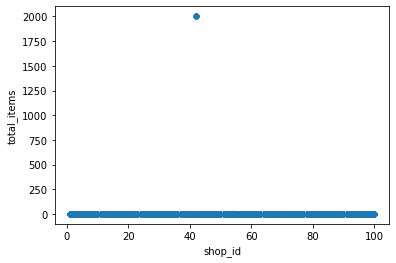

In [21]:
data.plot(kind = 'scatter', x = 'shop_id', y = 'total_items')

#### Create scatter plot of total_items with respect to order_amount to help visualize problem

<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

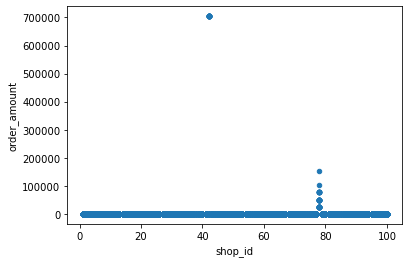

In [22]:
data.plot(kind = 'scatter', x = 'shop_id', y = 'order_amount')

#### Created a mask to review all order_amounts above 1000

In [18]:
pd.set_option('display.max_rows', None)
mask = data['order_amount']>1000
data[mask].sort_values('order_amount', ascending = False)

order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
4868      4869       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   
691        692       78      878        154350            6          debit   
2492      2493       78      834        102900            4          debit   
3724      3725       78      766         77175            3    credit_card   
4192      4193       78      787         77175            3    credit_card   
4420      4421       78      969         77175            3          debit   
2906      2907       78      817         77175            3          debit   
4715      4716       78      818         77175            3          debit   
2564      2565       78      915         77175            3          debit   
3403      3404       78      928         77175            3          debit   
2690      2691       78      962         77175            3          debit   
1259      1260       78      775         77175            3    credit_card   
1529      1530       78      810         51450            2           cash   
2818      2819       78      869         51450            2          debit   
4079      4080       78      946         51450            2           cash   
4311      4312       78      960         51450            2          debit   
4412      4413       78      756         51450            2          debit   
617        618       78      760         51450            2           cash   
3705      3706       78      828         51450            2    credit_card   
2821      2822       78      814         51450            2           cash   
3101      3102       78      855         51450            2    credit_card   
3167      3168       78      927         51450            2           cash   
511        512       78      967         51450            2           cash   
493        494       78      983         51450            2           cash   
490        491       78      936         51450            2          debit   
2512      2513       78      935         51450            2          debit   
2495      2496       78      707         51450            2           cash   
2452      2453       78      709         51450            2           cash   
3780      3781       78      889         25725            1           cash   
2270      2271       78      855         25725            1    credit_card   
4505      4506       78      866         25725            1          debit   
4040      4041       78      852         25725            1           cash   
1056      1057       78      800         25725            1          debit   
4584      4585       78      997         25725            1           cash   
160        161       78     

#### Also reviewed the items sorted by total_items

In [43]:
data[mask].sort_values('total_items', ascending = True)

order_id  shop_id  user_id  order_amount  total_items payment_method  \
2687      2688       69      776           131            1          debit   
2686      2687       91      883           160            1           cash   
3834      3835        7      986           112            1          debit   
3836      3837       10      971           148            1           cash   
2265      2266       56      737           117            1           cash   
1338      1339       87      777           149            1           cash   
3838      3839       17      748           176            1           cash   
1336      1337       54      811           133            1           cash   
2266      2267       27      756           169            1    credit_card   
1334      1335       13      764           160            1           cash   
1333      1334       79      844           181            1    credit_card   
1332      1333       19      829           163            1           cash   
3842      3843       85      996           172            1          debit   
3832      3833       31      920           129            1          debit   
1330      1331       97      706           162            1           cash   
3848      3849       91      726           160            1    credit_card   
3850      3851       36      886           130            1          debit   
1324      1325       14      838           116            1           cash   
3852      3853       40      939           161            1          debit   
3853      3854       62      794           160            1           cash   
3854      3855       30      994           153            1          debit   
1320      1321        6      871           187            1           cash   
3855      3856       28      975           164            1           cash   
2269      2270       98      827           133            1    credit_card   
2271      2272       31      934           129            1          debit   
1316      1317       80      968           145            1          debit   
3859      3860       90      821           178            1    credit_card   
3845      3846        7      755           112            1    credit_card   
3860      3861       99      743           195            1          debit   
3106      3107       25      937           130            1    credit_card   
1347      1348       86      943           130            1    credit_card   
1376      1377       53      778           112            1          debit   
3112      3113       48      891           117            1          debit   
3807      3808       57      757           147            1           cash   
3808      3809       77      786           156            1          debit   
1372      1373       83      884           129            1          debit   
3111      3112       52      831           146            1           cash   
1370      1371       97      919           162            1    credit_card   
1369      1370       66      979           161            1           cash   
3110      3111        1      742           158            1    credit_card   
3812      3813       98      965           133            1          debit   
1366      1367       59      977           178            1           cash   
3815      3816       72      896           160            1           cash   
3829      3830       67      938           131            1    credit_card   
3816      3817       59      887           178            1           cash   
2257      2258       43      848           181            1           cash   
1359      1360       67      872           131            1           cash   
1358      1359        3      728           148            1           cash   
2260      2261       15      989           153            1    credit_card   
2261      2262       64      845           133            1          debit   
1354      1355       83     

#### Created a new column which is the cost per shoe for each order

In [25]:
data['Amount_Per_Shoe'] = data['order_amount']/ data['total_items']

In [28]:
data.sort_values('Amount_Per_Shoe', ascending = False)

order_id  shop_id  user_id  order_amount  total_items payment_method  \
4420      4421       78      969         77175            3          debit   
2906      2907       78      817         77175            3          debit   
4505      4506       78      866         25725            1          debit   
493        494       78      983         51450            2           cash   
2452      2453       78      709         51450            2           cash   
1452      1453       78      812         25725            1    credit_card   
3167      3168       78      927         51450            2           cash   
3403      3404       78      928         77175            3          debit   
4918      4919       78      823         25725            1           cash   
2773      2774       78      890         25725            1           cash   
2492      2493       78      834        102900            4          debit   
2495      2496       78      707         51450            2           cash   
1384      1385       78      867         25725            1           cash   
4079      4080       78      946         51450            2           cash   
3705      3706       78      828         51450            2    credit_card   
1259      1260       78      775         77175            3    credit_card   
1193      1194       78      944         25725            1          debit   
3151      3152       78      745         25725            1    credit_card   
2564      2565       78      915         77175            3          debit   
1529      1530       78      810         51450            2           cash   
3440      3441       78      982         25725            1          debit   
4412      4413       78      756         51450            2          debit   
2548      2549       78      861         25725            1           cash   
2821      2822       78      814         51450            2           cash   
4192      4193       78      787         77175            3    credit_card   
2512      2513       78      935         51450            2          debit   
511        512       78      967         51450            2           cash   
2818      2819       78      869         51450            2          debit   
490        491       78      936         51450            2          debit   
3724      3725       78      766         77175            3    credit_card   
1204      1205       78      970         25725            1    credit_card   
1419      1420       78      912         25725            1           cash   
4311      4312       78      960         51450            2          debit   
2690      2691       78      962         77175            3          debit   
617        618       78      760         51450            2           cash   
3101      3102       78      855         51450            2    credit_card   
1056      1057       78      800         25725            1          debit   
3780      3781       78      889         25725            1           cash   
4584      4585       78      997         25725            1           cash   
160        161       78      990         25725            1    credit_card   
2922      2923       78      740         25725            1          debit   
2270      2271       78      855         25725            1    credit_card   
4715      4716       78      818         77175            3          debit   
691        692       78      878        154350            6          debit   
4040      4041       78      852         25725            1           cash   
3085      3086       78      910         25725            1           cash   
3697      3698       42      839           352            1          debit   
1929      1930       42      770           352            1    credit_card   
1911      1912       42      739           704            2           cash   
308        309       42      770           352            1    credit_card   
2987      2988       42     

#### Cleaned the data further by dropping the outlier data. This was selected as any purchased from shop ID 78 and any order of items over 8 (the previous order average found using describe). 

In [37]:
data.drop(data.index[data['shop_id']== 78], inplace = True)
mask = data['total_items']<9

#### Further visualized these data sets using a scatter plot and a box plot

<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

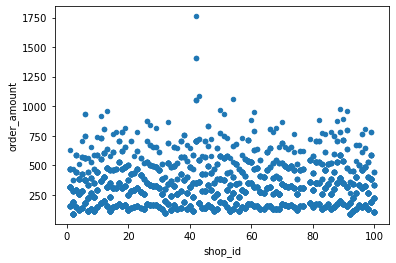

In [38]:
data[mask].plot(kind = 'scatter', x = 'shop_id', y = 'order_amount')

<AxesSubplot:>

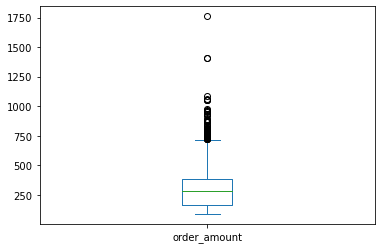

In [40]:
data[mask]['order_amount'].plot(kind = 'box')

#### The new important parameters can be seen below. I would used Amount_Per_Shoe as the important metric to report from this dataset. 

In [41]:
data[mask].describe()

order_id      shop_id      user_id  order_amount  total_items  \
count  4937.000000  4937.000000  4937.000000   4937.000000  4937.000000   
mean   2499.551347    49.846465   849.752279    302.580514     1.994734   
std    1444.069407    29.061131    86.840313    160.804912     0.982821   
min       1.000000     1.000000   700.000000     90.000000     1.000000   
25%    1248.000000    24.000000   775.000000    163.000000     1.000000   
50%    2497.000000    50.000000   850.000000    284.000000     2.000000   
75%    3751.000000    74.000000   925.000000    387.000000     3.000000   
max    5000.000000   100.000000   999.000000   1760.000000     8.000000   

       Amount_Per_Shoe  
count      4937.000000  
mean        151.788536  
std          29.034215  
min          90.000000  
25%         132.000000  
50%         153.000000  
75%         166.000000  
max         352.000000

### Question 2

<p>a.	Query:<br>
SELECT EmployeeID, COUNT(OrderID)<br>
FROM Orders<br> 
JOIN Shippers<br>
&nbsp;&nbsp;&nbsp;&nbsp; ON Shippers.ShipperID = Orders.ShipperID<br>
WHERE Shippers.ShipperName = 'Speedy Express'<br>

<p>Answer:<br>
54<p>

<p>b.	Query:<br>
SELECT Employees.LastName, COUNT(Employees.EmployeeID)<br> 
FROM Orders<br>
JOIN Employees<br>
&nbsp;&nbsp;&nbsp;&nbsp; ON Orders.EmployeeID = Employees.EmployeeID<br>
GROUP BY Employees.LastName<br>
ORDER BY COUNT(*) DESC<br>

Answer:<br>
Peacock<p>

<p>c.	Query:<br>
SELECT Products.ProductName<br>
FROM Orders<br>
JOIN Customers<br>
&nbsp;&nbsp;&nbsp;&nbsp; ON Customers.CustomerID = Orders.CustomerID<br>
JOIN OrderDetails<br>
&nbsp;&nbsp;&nbsp;&nbsp; ON OrderDetails.OrderID = Orders.OrderID<br>
JOIN Products<br>
&nbsp;&nbsp;&nbsp;&nbsp; ON Products.ProductID = OrderDetails.ProductID<br>
WHERE Customers.Country = 'Germany'<br>

Answer:<br>
Boston Crab Meat<p>
